<a href="https://colab.research.google.com/github/tanviablash/Prasunet_DS/blob/main/Prasunet_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DECISION TREE CLASSIFIER FOR PREDICTION**

In [6]:
pip install ucimlrepo

In [7]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#pre-defined code by Bank Marketing for fetching dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [9]:
# Fetching dataset
bank_marketing = fetch_ucirepo(id=222)

# Data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


**Data Exploration**

In [10]:
# Displaying the first few rows
print(X.head())

# Checking for missing values
print(X.isnull().sum())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  
age                0
job              288
marital            0
education       1857
default  

**Data Cleaning**

In [11]:
# Filling missing values for categorical features
X.loc[:, 'contact'] = X['contact'].fillna(X['contact'].mode()[0])
X.loc[:, 'pdays'] = X['pdays'].fillna(-1)  # For 'pdays', -1 means not previously contacted

# Converting target variable to binary
y = bank_marketing.data.targets['y'].map({'yes': 1, 'no': 0})

# Converting categorical features to dummy variables
X = pd.get_dummies(X, drop_first=True)


**Train-Test Split**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Building Decision Tree classifier**

In [13]:
# Creating the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fitting the model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [14]:
# Making predictions
y_pred = model.predict(X_test)


**Evaluate the Model**

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7952
           1       0.46      0.47      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.69      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



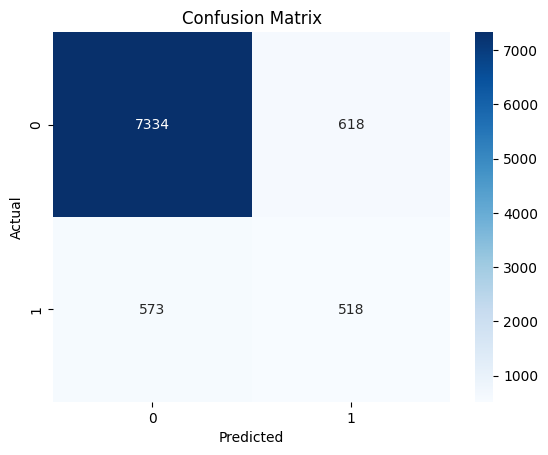

In [15]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Printing classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**VISUALISATION OF DECISION TREE**

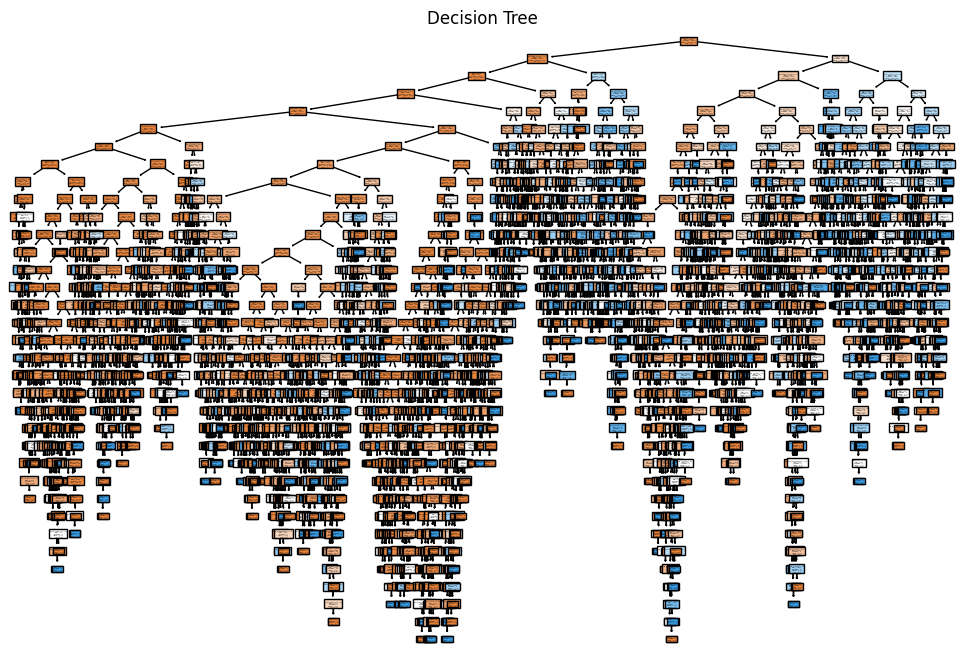

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title('Decision Tree')
plt.show()

**Feature Importance Analysis**

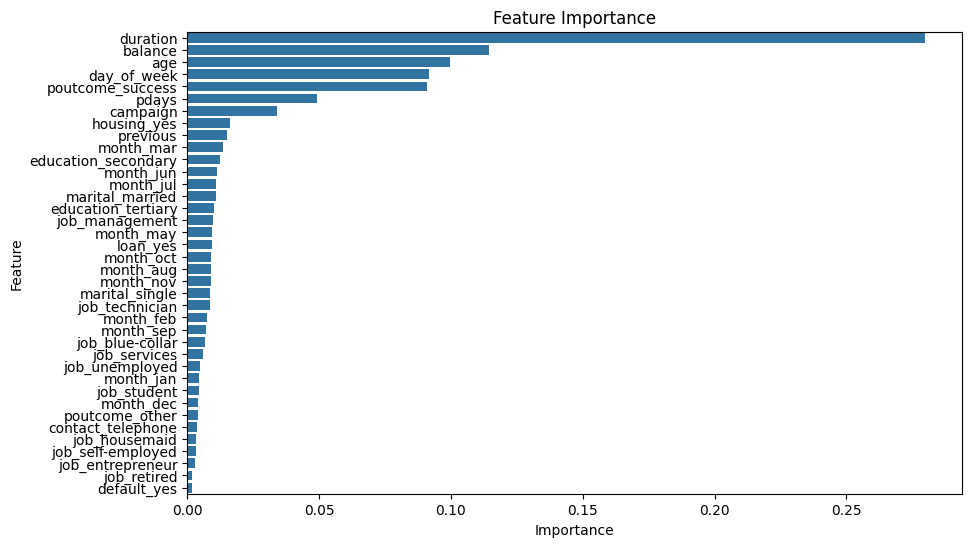

In [17]:
importances = model.feature_importances_
feature_names = X.columns

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Ploting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


**Hyperparameter Tuning**

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}


**Cross - Validation**

In [19]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores):.2f}')


Cross-Validation Scores: [0.79321022 0.61192214 0.70559611 0.62817961 0.59400575]
Mean CV Score: 0.67


**Confusion Matrix Analysis**

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')


Precision: 0.46, Recall: 0.47, F1 Score: 0.47


**Analyse Misclassifications**

In [21]:
misclassified = X_test[y_test != y_pred]
print(misclassified)


       age  balance  day_of_week  duration  campaign  pdays  previous  \
34145   33      498           30       301         1     -1         0   
31271   31      883            5       112         2    106         1   
41828   30      536           15       244         1    105         1   
34197   33     5437            4       267         1     91         1   
24802   56      589           18       208         1     26         3   
...    ...      ...          ...       ...       ...    ...       ...   
39484   40      312           25       612         7     -1         0   
43042   45      226           15        91         4    185         6   
42774   36     3949           28       130         2     -1         0   
42431   45        0            7       344         1     -1         0   
31397   26      689           25        78         1     -1         0   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jan  \
34145             True             False        